## Outline
* Здесь приводится пример задачи ML, в которой наглядно продемонстирована необходимость использования двухшаговой кроссвалидации для оценки (assessment) точности предсказания алгоритма ML

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

## Данные

In [2]:
# Генерим случайный бинарный вектор длинф L, генерим d признаков из нормального стандартного распределения N(0,1)
from random import SystemRandom, normalvariate

L = 50
d = 1000

gen_train = pd.DataFrame.from_records([
        [ SystemRandom().randint(0,1)]+ [normalvariate(0, 1) for j in range(d)] 
        for i in range(L)
    ], columns = ['Label']+ ['F'+str(j)  for j in range(d)])

In [3]:
gen_train.head()

,Label,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F990,F991,F992,F993,F994,F995,F996,F997,F998,F999
0,0,0.133441,0.323929,1.151031,0.370131,-1.210899,0.299238,0.147287,-1.356381,0.659751,...,-0.048953,-0.284164,0.110074,-0.385535,1.779334,-1.029517,0.332254,1.370187,0.378496,0.326821
1,1,0.927999,0.738369,-1.318650,-1.157384,-1.312895,-0.520024,-1.405671,-1.557055,1.673427,...,-0.501969,0.723022,-0.518079,-1.520135,0.807786,1.100347,0.694287,-0.918944,-0.150169,-0.617753
2,1,-0.596389,1.928563,1.038034,-1.442442,-0.324021,1.233531,0.219762,-1.881545,0.362055,...,0.499370,-0.300145,0.442602,0.161332,-0.104871,-0.465757,-0.891255,0.422372,0.069115,0.791895
3,1,-3.288346,1.811145,0.951596,0.828448,1.527800,1.181753,-2.043657,-0.446719,1.916242,...,-0.636638,-0.190428,0.224536,-0.767514,1.320138,-2.105155,-1.437391,-0.487838,-0.585650,1.271212
4,0,-0.984778,-1.340480,-1.182860,0.013299,-0.131392,1.549053,-0.325660,2.434903,-0.051814,...,1.262122,-0.061724,0.009630,-2.101094,0.543839,-0.306864,1.551867,-0.826922,-0.020731,-0.922780


In [4]:
gen_train.groupby(['Label'])['Label'].count()

Label
0    19
1    31
Name: Label, dtype: int64

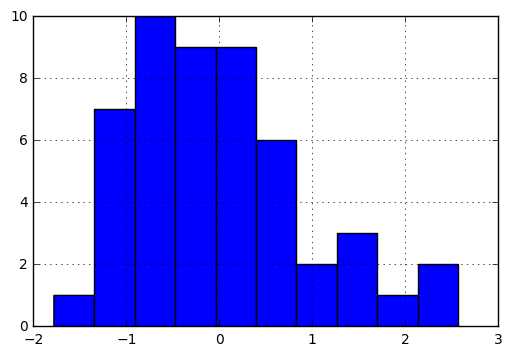

In [5]:
gen_train['F13'].hist()

** Вопрос**
 - Какая максмальная точность классификации может быть достигнута на данном дата-сете?

## Метод обучения: Decision Stump\1-NN + q-Fold

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import accuracy_score

def qFold_accuracy(x,y, estimator, cv_strategy):
    score = 0
    for train_indices, test_indices in cv_strategy:
        estimator.fit(x[train_indices], y[train_indices])
        score += estimator.score(x[test_indices], y[test_indices])
    return score/len(cv_strategy)

In [ ]:
# Проводим эксперимент по нестройке классификатора, опирающегося на 1 признак
max_score = 0
f=0 
cv_k = 10
# kf = KFold(L,cv_k)                                 
kf = StratifiedKFold(np.asarray(gen_train['Label']), cv_k, shuffle = True) 
for j in range(1,d+1):       # номер признака
    #    print '\n', '\n' #, kf_1

    scrrr  = qFold_accuracy(np.asarray(gen_train[[gen_train.columns[j]]]),np.asarray(gen_train[['Label']]).ravel(),KNeighborsClassifier(n_neighbors=1), kf)
#    print i,"-th feature = ",scrrr
    if(scrrr > max_score):
        max_score = scrrr
        f = j-1
print('q-Fold score:', max_score)
print('The best feature No:', f)

## Генерим Estimation Set (test set, CV1)

In [ ]:
# estimation set
gen_test = pd.DataFrame.from_records([
        [ SystemRandom().randint(0,1)]+ [normalvariate(0, 1) for j in range(1)] 
        for i in range(50)
    ], columns = ['Label']+ ['F'+str(j)  for j in range(1)])

## Оцениваем точность финального алгоритма на Estimation Set

In [ ]:
# True score on Test Set
clf = DecisionTreeClassifier()
clf.fit(np.asarray(gen_train[['F'+str(f)]]), np.asarray(gen_train[['Label']]))
print(accuracy_score(clf.predict(np.asarray(gen_test[['F0']])), np.asarray(gen_test[['Label']])))